In [11]:
import pandas as pd
from config import CAR_RESULTS_FILE, CAR_CSV_FILE
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

In [4]:
df = pd.read_csv(CAR_CSV_FILE, encoding="utf-8")
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 337 entries, 0 to 336
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   index                     337 non-null    int64  
 1   Qiymət                    337 non-null    object 
 2   Valyuta                   337 non-null    object 
 3   Şəhər                     337 non-null    object 
 4   Marka                     337 non-null    object 
 5   Model                     337 non-null    object 
 6   Buraxılış ili             337 non-null    int64  
 7   Ban növü                  337 non-null    object 
 8   Rəng                      337 non-null    object 
 9   Mühərrik                  337 non-null    object 
 10  Yürüş                     337 non-null    object 
 11  Sürətlər qutusu           337 non-null    object 
 12  Ötürücü                   337 non-null    object 
 13  Yeni                      337 non-null    object 
 14  Yerlərin s

,index,Qiymət,Valyuta,Şəhər,Marka,Model,Buraxılış ili,Ban növü,Rəng,Mühərrik,Yürüş,Sürətlər qutusu,Ötürücü,Yeni,Yerlərin sayı,Vəziyyəti,Hansı bazar üçün yığılıb,Sahiblər,Qəzalı
0,8827958,59 000,AZN,Bakı,Hyundai,Mighty EX5,2024,Yük maşını,Ağ,2.8 L / 150 a.g. / Dizel,0 km,Mexaniki,Arxa,Bəli,3.0,"Vuruğu yoxdur, rənglənməyib",Avropa,NaN,NaN
1,9465552,40 700,USD,Bakı,Lexus,ES 200,2022,Sedan,Qara,2.0 L / 150 a.g. / Benzin,38 000 km,Avtomat,Ön,Xeyr,5.0,"Vuruğu yoxdur, rənglənməyib",Rəsmi diler,1,NaN
2,9406987,8 000,AZN,Xırdalan,Kia,Rio,2005,"Universal, 5 qapı",Gümüşü,1.5 L / 97 a.g. / Benzin,320 000 km,Avtomat,Ön,Xeyr,5.0,"Vuruğu yoxdur, rənglənməyib",Digər,2,NaN
3,8246407,37 900,USD,Bakı,Mitsubishi,L200,2024,"Pikap, ikiqat kabin",Qara,2.4 L / 147 a.g. / Dizel,0 km,Mexaniki,Tam,Bəli,5.0,"Vuruğu yoxdur, rənglənməyib",Rəsmi diler,NaN,NaN
4,9171648,40 000,AZN,Bakı,Toyota,Corolla,2024,Sedan,Ağ,1.8 L / 136 a.g. / Hibrid,6 000 km,Variator,Ön,Xeyr,5.0,"Vuruğu yoxdur, rənglənməyib",Rəsmi diler,1,NaN


In [18]:
df.rename(columns={"Qiymət": "Price"}, inplace=True)
df.rename(columns={"Valyuta": "Currency"}, inplace=True)
df.rename(columns={"Şəhər": "City"}, inplace=True)
df.rename(columns={"Marka": "Marka"}, inplace=True)
df.rename(columns={"Model": "Model"}, inplace=True)
df.rename(columns={"Buraxılış ili": "Production_Year"}, inplace=True)
df.rename(columns={"Ban növü": "Ban_Type"}, inplace=True)
df.rename(columns={"Rəng": "Color"}, inplace=True)
df.rename(columns={"Mühərrik": "Engine"}, inplace=True)
df.rename(columns={"Yürüş": "Mileage"}, inplace=True)
df.rename(columns={"Sürətlər qutusu": "Gearbox"}, inplace=True)
df.rename(columns={"Ötürücü": "Transmission"}, inplace=True)
df.rename(columns={"Yeni": "New"}, inplace=True)
df.rename(columns={"Yerlərin sayı": "Seats"}, inplace=True)
df.rename(columns={"Vəziyyəti": "Condition"}, inplace=True)
df.rename(columns={"Hansı bazar üçün yığılıb": "Bazar_Type"}, inplace=True)
df.rename(columns={"Sahiblər": "Owners"}, inplace=True)
df.rename(columns={"Qəzalı": "Accident_History"}, inplace=True)

df


,index,Price,Currency,City,Marka,Model,Production_Year,Ban_Type,Color,Engine,Mileage,Gearbox,Transmission,New,Seats,Condition,Bazar_Type,Owners,Accident_History
0,8827958,59 000,AZN,Bakı,Hyundai,Mighty EX5,2024,Yük maşını,Ağ,2.8 L / 150 a.g. / Dizel,0 km,Mexaniki,Arxa,Bəli,3.0,"Vuruğu yoxdur, rənglənməyib",Avropa,NaN,NaN
1,9465552,40 700,USD,Bakı,Lexus,ES 200,2022,Sedan,Qara,2.0 L / 150 a.g. / Benzin,38 000 km,Avtomat,Ön,Xeyr,5.0,"Vuruğu yoxdur, rənglənməyib",Rəsmi diler,1,NaN
2,9406987,8 000,AZN,Xırdalan,Kia,Rio,2005,"Universal, 5 qapı",Gümüşü,1.5 L / 97 a.g. / Benzin,320 000 km,Avtomat,Ön,Xeyr,5.0,"Vuruğu yoxdur, rənglənməyib",Digər,2,NaN
3,8246407,37 900,USD,Bakı,Mitsubishi,L200,2024,"Pikap, ikiqat kabin",Qara,2.4 L / 147 a.g. / Dizel,0 km,Mexaniki,Tam,Bəli,5.0,"Vuruğu yoxdur, rənglənməyib",Rəsmi diler,NaN,NaN
4,9171648,40 000,AZN,Bakı,Toyota,Corolla,2024,Sedan,Ağ,1.8 L / 136 a.g. / Hibrid,6 000 km,Variator,Ön,Xeyr,5.0,"Vuruğu yoxdur, rənglənməyib",Rəsmi diler,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
332,9312719,42 000,AZN,Bakı,Toyota,Corolla,2024,Sedan,Ağ,1.8 L / 136 a.g. / Hibrid,18 000 km,Variator,Ön,Xeyr,5.0,"Vuruğu yoxdur, rənglənməyib",NaN,1,NaN
333,9405983,37 000,AZN,Bakı,Mercedes,C 300,2019,Sedan,Ağ,2.0 L / 249 a.g. / Benzin,117 482 km,Avtomat,Arxa,Xeyr,NaN,"Vuruğu yoxdur, rənglənməyib",Amerika,1,NaN
334,9409645,59 800,USD,Sumqayıt,BMW,X5,2021,"Offroader / SUV, 5 qapı",Qara,3.0 L / 340 a.g. / Benzin,89 000 km,Avtomat,Tam,Xeyr,5.0,"Vuruğu yoxdur, rənglənməyib",Amerika,1,NaN
335,9347731,82 800,AZN,Bakı,IM,L6,2025,Liftbek,Qara,787 a.g. / Elektro,0 km,Reduktor,Tam,Bəli,5.0,"Vuruğu yoxdur, rənglənməyib",Rəsmi diler,NaN,NaN


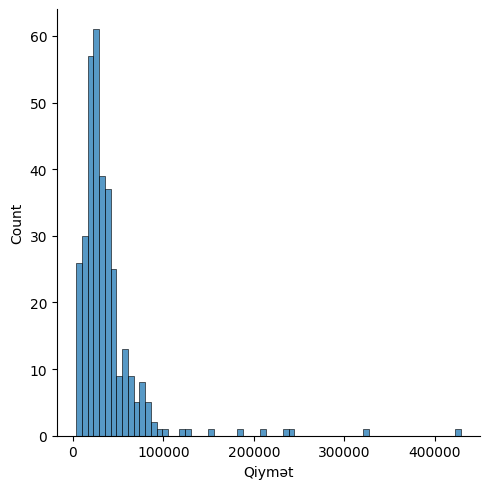

In [81]:
# Step 1: Remove spaces and any non-numeric character except digits
df['Qiymət'] = df['Qiymət'].str.replace(r'\s+', '', regex=True).astype(int)

# Optional: Convert to float if needed
df['Qiymət'] = df['Qiymət'].astype(float)
sns.displot(df["Qiymət"])

<Axes: xlabel='count', ylabel='Count'>

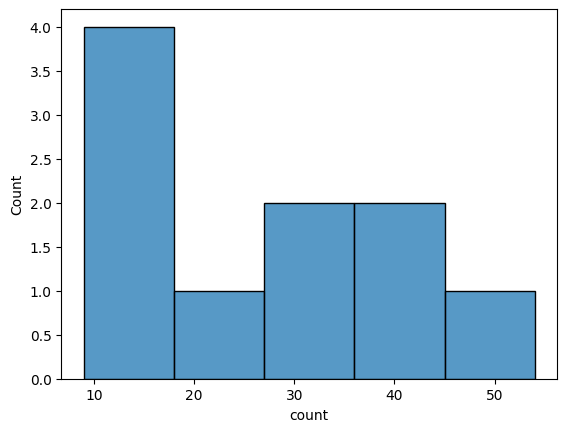

In [ ]:
top_brands = df["Marka"].value_counts().head(10)
sns.histplot(top_brands)

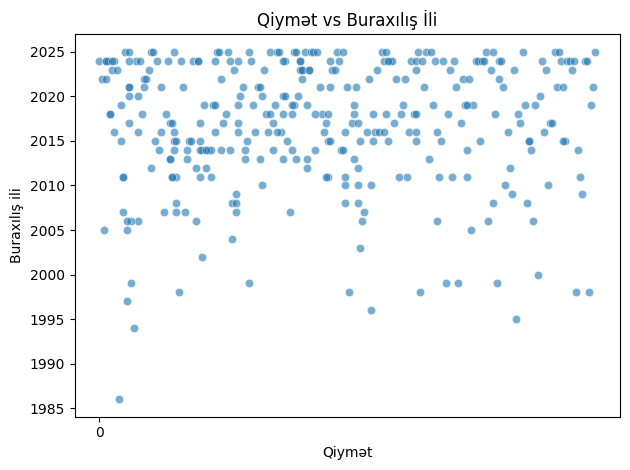

In [14]:
# Sample plot
sns.scatterplot(x="Qiymət", y="Buraxılış ili", data=df, alpha=0.6)

# Restrict x-axis ticks to multiples of 5000 (or any step you want)
plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(base=5000))

# Optional: Format with thousand separators
plt.gca().xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))

# Add labels and title
plt.title("Qiymət vs Buraxılış İli")
plt.xlabel("Qiymət")
plt.ylabel("Buraxılış ili")

# Show the plot
plt.tight_layout()
plt.show()